In [2]:
import os
import numpy as np
import scipy.io.wavfile as sio_wav
import scipy.signal as sig
import matplotlib.pyplot as plt

shape of signal: (94463,)
sample rate: 48000

pulse width: 48
number of pulses: 1782
pulse period: 53
pulse train shape: (94446,)
train numer of pulses: 94446


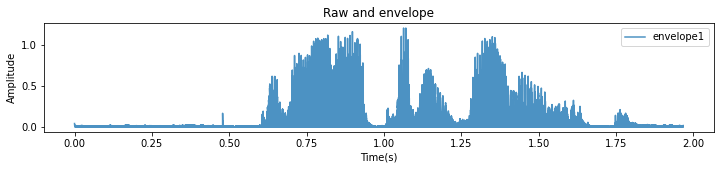

In [14]:
# read the wavfile
wavfile = 'example.wav'
fs, signal = sio_wav.read(wavfile) 

print(f"shape of signal: {signal.shape}")
print(f"sample rate: {fs}") # fs = 48000

signal = signal / np.max(np.abs(signal))

env = sig.hilbert(signal)
#amplitude_envelope = sig.hilbert(signal)
amplitude_envelope = np.abs(env)
#print(f"shape amplitude envelope: {amplitude_envelope.shape}")

time = np.arange(0, len(signal)/fs, 1/fs) # time array

# Pulses 
pulse_width = int(0.001 * fs) # 48 samples * ms
pulse_freq = 900 # Hz
pulse_period = int(fs / pulse_freq)
n_pulses = int(len(amplitude_envelope) / pulse_period)
print(f"\npulse width: {pulse_width}\nnumber of pulses: {n_pulses}\npulse period: {pulse_period}")

pulse_train = np.tile(np.concatenate((np.ones(pulse_width), np.zeros(pulse_period - pulse_width))), n_pulses)
print(f"pulse train shape: {pulse_train.shape}\ntrain numer of pulses: {n_pulses*pulse_period}")
# applying envelope to the pulse train
env_pulse = pulse_train * amplitude_envelope[:len(pulse_train)]

#plt.plot(time[:len(env_pulse)], signal[:len(env_pulse)], label="raw")
plt.figure(figsize=(12, 2))
plt.plot(time[:len(env_pulse)], env_pulse, label="envelope1", alpha=0.8)
#plt.plot(time, amplitude_envelope, label="envelope")
plt.legend()
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.title("Raw and envelope")
# plt.xlim([0.5, 0.55])
plt.show()